In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F


In [3]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [4]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
#grab MNIST IMAGE ----> TENSORS

transform = transforms.ToTensor()



In [6]:
#Download train data
#Train set the train must = True, if not it become test data
train_data = datasets.MNIST(root='C:/Users/A221LPEN/Desktop/Pytorch_for_Deep_Learning/PYTORCH_NOTEBOOKS/myCodes/Data', train=True, download=True, transform=transform)

In [7]:
#Download test data
test_data = datasets.MNIST(root='C:/Users/A221LPEN/Desktop/Pytorch_for_Deep_Learning/PYTORCH_NOTEBOOKS/myCodes/Data', train=False, download=True, transform=transform)

In [8]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Split: train
    Root Location: C:/Users/A221LPEN/Desktop/Pytorch_for_Deep_Learning/PYTORCH_NOTEBOOKS/myCodes/Data
    Transforms (if any): ToTensor()
    Target Transforms (if any): None

In [9]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Split: test
    Root Location: C:/Users/A221LPEN/Desktop/Pytorch_for_Deep_Learning/PYTORCH_NOTEBOOKS/myCodes/Data
    Transforms (if any): ToTensor()
    Target Transforms (if any): None

In [10]:
type(train_data)

torchvision.datasets.mnist.MNIST

In [11]:
train_data[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [12]:
type(train_data[0])

tuple

In [13]:
image,label = train_data[0]

In [14]:
image.shape # the 1=grayscale, single colour channel, sometimes -1 to 1 instead 0 to 1 

torch.Size([1, 28, 28])

In [15]:
label

5

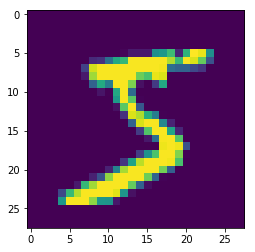

In [16]:
plt.imshow(image.reshape((28,28)))
#Displays an image, drop the info abour grayscale
#the program will know it by default
#matplotlib has default colour mapping --viridis


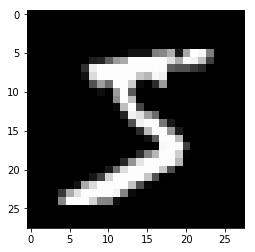

In [17]:
#to view in grayscale
plt.imshow(image.reshape((28,28)),cmap='gray') #or use gist_yarg for reversed

In [18]:
#lots of parameters required to train the 60k data
#therefore it makes sense to train in batches
#grab subsets of the 60k images & load them in
torch.manual_seed(101) #take the data from random shuffle

train_loader = DataLoader(train_data,batch_size=100,shuffle=True) #feed 100 images at a time out of the 60k into network images
#shuffle the data to make the program able to generelized the data 0 and 1 instead of focusing/learning on 1 type of data

test_loader = DataLoader(test_data,batch_size=500,shuffle=False)

In [19]:
#Note: train data is  the Pytorch dataset objects--objects that supports data loading & sampling
#batch size is number of records we process at a time
#If its not evenly divisable into dataset,then the final batch would contain that remainder
#setting the shuffle to True means that the dataset will be shuffled after each epoch


In [20]:
from torchvision.utils import make_grid  #make grid line
np.set_printoptions(formatter=dict(int=lambda x: f'{x:4}')) #FORMATTING


In [21]:
#FIRST BATCH
for images,labels in train_loader:
    #60K /100 ---this for loop will run 60 times
    #to get the first batch ONLY, adds in break
    break

In [22]:
images.shape #shape is (batch, colour channel, width, height)

torch.Size([100, 1, 28, 28])

In [23]:
labels.shape

torch.Size([100])

Labels [   0    5    7    8    6    7    9    7    1    3    8    4]


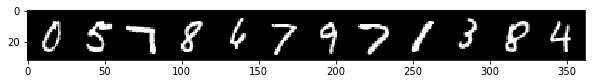

In [24]:
#print first 12 labels
print('Labels', labels[:12].numpy())

#print the first 12 images
im = make_grid(images[:12], nrow=12) #default nrow is 8
plt.figure(figsize=(10,4))
#transpose images from CWH to WHC
plt.imshow(np.transpose(im.numpy(), (1,2,0)));


In [24]:
#this is rather sloppy, 6 might be mistaken as 4

In [25]:
#PART 2 --Creating network

In [25]:
#create a normal multilayer perceptron model
class MultilayerPerceptron(nn.Module):
    
    def __init__(self,in_sz=784,out_sz=10,layers=[120,84]):
        
        super().__init__()
        
        #fully connected layer
        self.fc1 = nn.Linear(in_sz,layers[0]) #connect input layer to layer 0 or 120
        self.fc2 = nn.Linear(layers[0],layers[1])
        self.fc3 = nn.Linear(layers[1],out_sz)
        
        
    def forward(self,X):
        
        X = F.relu(self.fc1(X)) #relu as activation fn, parse in fully connvected layer 1 with X
        X = F.relu(self.fc2(X))
        X = self.fc3(X)
        
        return F.log_softmax(X,dim=1) #MULTI CLASS CLASSIFICATION
        

In [26]:
torch.manual_seed(101)
model = MultilayerPerceptron()
model

MultilayerPerceptron(
  (fc1): Linear(in_features=784, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [27]:
# ANN ---> CNN
#CNN architecture is more efficient 
for param in model.parameters():
    print(param.numel())

94080
120
10080
84
840
10


In [27]:
# Connection=94080,Biases=120,Connection to next layer=10080, Biases=84,Cnnection to next layer=840, output neuron =10

In [28]:
# 105214 total parameters--these are all adjusted by network (less parameter = more efficient)


In [28]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)

In [29]:
images.shape #convert the shape into single dimension [100,784]--flatten

torch.Size([100, 1, 28, 28])

In [30]:
images.view(100,-1).shape #-1 means grab the rest of dimension & combine them into single dimension


torch.Size([100, 784])

In [31]:
#PART 3 ---> TRAINING & EVALUATION
import time
start_time = time.time()


#TRAINING

epochs = 10
#TRACKERS
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    
    trn_corr = 0
    tst_corr = 0
    
    for b, (X_train,y_train) in enumerate(train_loader): 
    #train_loader returns image(X_train) and its label (y_train)
    #enumerate = keep track of the batch with b
        b+=1 #start at 1 instead 0
        y_pred = model(X_train.view(100,-1))
        #this would perform poorly 
        #rand init of weight&biases, go ahead & predict based of X_train, what the y label should be (y_train)
        #then we'll have the y_pred & we should compare it to y_train to evaluate loss
        loss = criterion(y_pred,y_train)
        
        #in the 10 neurons, the probability would be [min...max] --> [0.1,0.0....,0.8]
        #grab the max value & index it to transform into predicted number eg 9 instead of probability
        predicted = torch.max(y_pred.data,1)[1]
        batch_corr = (predicted == y_train).sum() #calc how many correct of this batch
        trn_corr += batch_corr
        
        #update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    
        if b%200 == 0: #if batch evenly divisable by 200,
            acc = trn_corr.item()*100/(100*b) #calc accuracy
            print(f'Epoch {i} batch{b} loss:{loss.item()} accuracy:{acc}')
            
    train_losses.append(loss)
    train_correct.append(trn_corr)
   
    #run test data during training to check how the test validation is going down
    #eventually the return of test data should be lesser
    with torch.no_grad():
        for b, (X_test,y_test) in enumerate(test_loader):
            y_val = model(X_test.view(500,-1)) #flatten 500 batch size for test
            
            predicted = torch.max(y_val.data,1)[1]
            tst_corr += (predicted==y_test).sum()
            
        loss = criterion(y_val,y_test)
        test_losses.append(loss)
        test_correct.append(tst_corr)
        



total_time = time.time() - start_time
print(f'Duration: {total_time/60} mins')

Epoch 0 batch200 loss:0.2805540859699249 accuracy:83.04
Epoch 0 batch400 loss:0.20303486287593842 accuracy:87.325
Epoch 0 batch600 loss:0.20227622985839844 accuracy:89.32333333333334
Epoch 1 batch200 loss:0.1445707082748413 accuracy:94.56
Epoch 1 batch400 loss:0.10489675402641296 accuracy:95.11
Epoch 1 batch600 loss:0.12034713476896286 accuracy:95.34666666666666
Epoch 2 batch200 loss:0.11627233773469925 accuracy:96.53
Epoch 2 batch400 loss:0.08906286954879761 accuracy:96.615
Epoch 2 batch600 loss:0.10235458612442017 accuracy:96.74
Epoch 3 batch200 loss:0.053589120507240295 accuracy:97.475
Epoch 3 batch400 loss:0.05533469840884209 accuracy:97.485
Epoch 3 batch600 loss:0.05723271518945694 accuracy:97.51
Epoch 4 batch200 loss:0.1291753351688385 accuracy:97.96
Epoch 4 batch400 loss:0.09339297562837601 accuracy:97.995
Epoch 4 batch600 loss:0.13001050055027008 accuracy:98.03333333333333
Epoch 5 batch200 loss:0.0457569845020771 accuracy:98.31
Epoch 5 batch400 loss:0.043589748442173004 accurac

In [ ]:
#PART 4 --->EVALUATION & PERFORMANCE

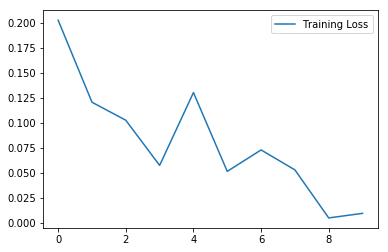

In [55]:
plt.plot(train_losses,label='Training Loss')
plt.legend()

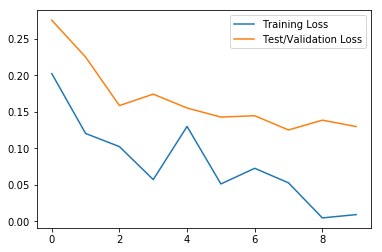

In [56]:
#COMPARE TO TEST LOSSES
plt.plot(train_losses,label='Training Loss')
plt.plot(test_losses,label='Test/Validation Loss')
plt.legend()

In [57]:
#Test data higher thatn Training data
#Test didn't do that well compared to Teaining since they are new dataset to the network (network nvr seen before)
#and weight and biases are not allowed to be adjusted in the test data

In [58]:
train_correct

[tensor(53594),
 tensor(57208),
 tensor(58044),
 tensor(58506),
 tensor(58820),
 tensor(59014),
 tensor(59227),
 tensor(59387),
 tensor(59435),
 tensor(59541)]

In [59]:
#calc train accuracy
train_acc = [t/600 for t in train_correct]

In [60]:
train_acc

[tensor(89),
 tensor(95),
 tensor(96),
 tensor(97),
 tensor(98),
 tensor(98),
 tensor(98),
 tensor(98),
 tensor(99),
 tensor(99)]

In [61]:
#calc test accuracy
test_acc = [t/100 for t in test_correct]

In [62]:
test_acc

[tensor(94),
 tensor(96),
 tensor(96),
 tensor(97),
 tensor(97),
 tensor(97),
 tensor(97),
 tensor(97),
 tensor(97),
 tensor(97)]

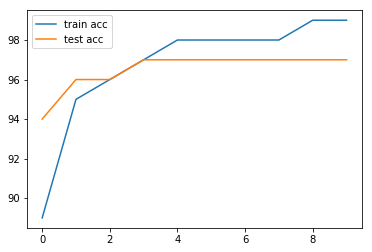

In [63]:
#plot both
plt.plot(train_acc,label='train acc')
plt.plot(test_acc,label='test acc')
plt.legend()

In [64]:
#trainig accuracy gets better in regards to epochs

In [68]:
#Run new unseen data to training network
# Extract the data all at once, not in batches
test_load_all = DataLoader(test_data, batch_size=10000, shuffle=False)

In [70]:
with torch.no_grad():
    correct = 0
    for X_test, y_test in test_load_all:
        y_val = model(X_test.view(len(X_test), -1))  # pass in a flattened view of X_test
        predicted = torch.max(y_val,1)[1]
        correct += (predicted == y_test).sum()
        
print(f'Test accuracy: {correct.item()}/{len(test_data)} = {correct.item()*100/(len(test_data)):7.3f}%')    

Test accuracy: 9767/10000 =  97.670%


In [73]:
#DISPLAY CONFUSION MATRIX ON THIS
confusion_matrix(predicted.view(-1),y_test.view(-1))

array([[ 970,    0,    2,    0,    0,    3,    4,    1,    4,    3],
       [   0, 1120,    2,    0,    0,    0,    3,    2,    0,    2],
       [   1,    4, 1003,    2,    2,    0,    2,    5,    3,    0],
       [   3,    3,    8,  996,    1,   22,    1,    2,    5,    9],
       [   0,    0,    2,    0,  962,    3,    8,    1,    3,   10],
       [   1,    0,    0,    1,    0,  853,    2,    0,    2,    3],
       [   1,    2,    1,    0,    4,    4,  935,    0,    1,    0],
       [   1,    1,    7,    6,    4,    1,    1, 1015,    5,   12],
       [   2,    5,    6,    4,    2,    6,    2,    1,  949,    6],
       [   1,    0,    1,    1,    7,    0,    0,    1,    2,  964]],
      dtype=int64)